<a href="https://colab.research.google.com/github/Sahanasd2003/Amazon-Sale-Report/blob/main/Amazon_Sale_Report_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/Amazon Sale Report (1).csv'
data = pd.read_csv(file_path)

In [ ]:
print("Initial Data:")
print(data.head())

Initial Data:
   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0

In [ ]:
# Assign meaningful column names
data.columns = [
    'Index', 'Order ID', 'Date', 'Status', 'Fulfillment',
    'Sales Channel', 'Ship Service Level', 'Category',
    'Size', 'Courier Status', 'Quantity', 'Currency',
    'Amount', 'Ship City', 'Ship State', 'Ship Postal Code',
    'Ship Country', 'B2B', 'Fulfilled By', 'New', 'Pending'
]


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

<ipython-input-9-2d3cf54d0c3a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


In [ ]:
data.dropna(subset=['Amount', 'Status'], inplace=True)

In [ ]:
shipped_items = data[data['Status'].str.contains('Shipped', na=False)]

In [ ]:
product_preferences = shipped_items.groupby('Category')['Quantity'].sum().reset_index()
top_products = product_preferences.sort_values(by='Quantity', ascending=False)

In [ ]:
geographical_distribution = shipped_items.groupby('Ship State')['Amount'].sum().reset_index()
geographical_distribution = geographical_distribution.sort_values(by='Amount', ascending=False)


<ipython-input-15-a9c3a2f6132c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Quantity', y='Category', palette='viridis')


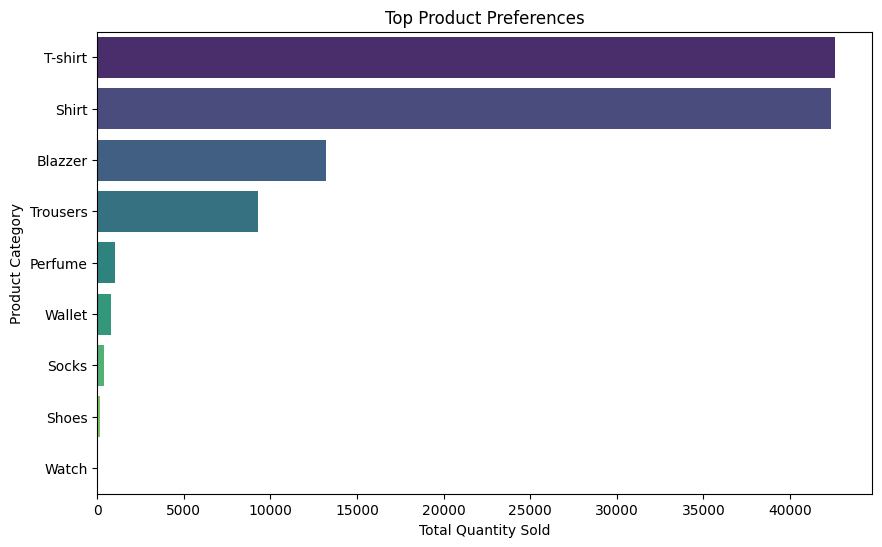

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='Quantity', y='Category', palette='viridis')
plt.title('Top Product Preferences')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Category')
plt.show()

<ipython-input-16-014aacdffd2e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=geographical_distribution, x='Amount', y='Ship State', palette='magma', orient='h')


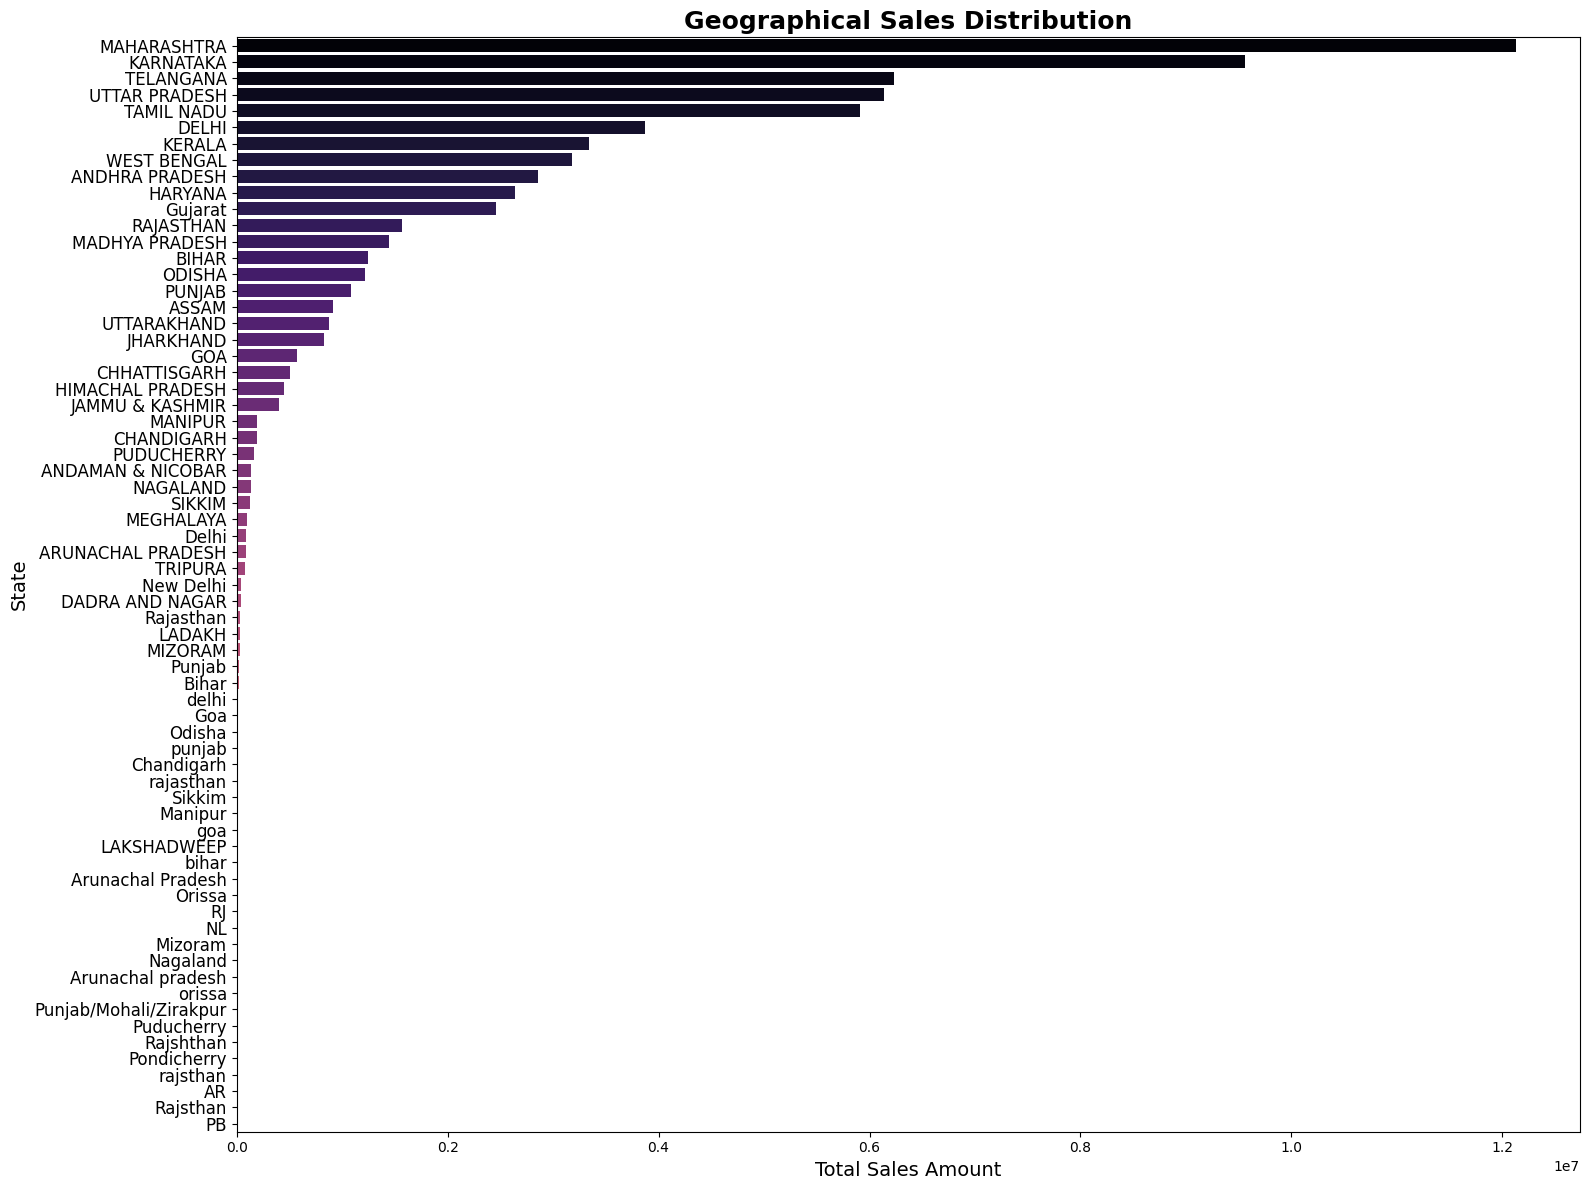

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 12))
sns.barplot(data=geographical_distribution, x='Amount', y='Ship State', palette='magma', orient='h')
plt.title('Geographical Sales Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Total Sales Amount', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.yticks(fontsize=12, rotation=0)
plt.subplots_adjust(left=0.25, right=0.95, top=0.9, bottom=0.1)


plt.tight_layout()
plt.show()

In [ ]:
recommendations = {
    'Sales Strategies': [
        'Focus on top-selling product categories to optimize inventory.',
        'Implement targeted marketing campaigns for high-demand regions.'
    ],
    'Inventory Management': [
        'Maintain adequate stock levels for best-selling items.',
        'Analyze sales trends to adjust inventory based on seasonal demand.'
    ],
    'Customer Service': [
        'Enhance customer support for inquiries related to popular products.',
        'Consider customer feedback to improve product offerings.'
    ]
}

In [ ]:
print("\nRecommendations:")
for category, items in recommendations.items():
    print(f"\n{category}:")
    for item in items:
        print(f"- {item}")



Recommendations:

Sales Strategies:
- Focus on top-selling product categories to optimize inventory.
- Implement targeted marketing campaigns for high-demand regions.

Inventory Management:
- Maintain adequate stock levels for best-selling items.
- Analyze sales trends to adjust inventory based on seasonal demand.

Customer Service:
- Enhance customer support for inquiries related to popular products.
- Consider customer feedback to improve product offerings.


In [ ]:
top_products.to_csv('Top_Product_Preferences.csv', index=False)
geographical_distribution.to_csv('Geographical_Sales_Distribution.csv', index=False)

In [ ]:
print("\nAnalysis complete. Insights saved to 'Top_Product_Preferences.csv' and 'Geographical_Sales_Distribution.csv'.")


Analysis complete. Insights saved to 'Top_Product_Preferences.csv' and 'Geographical_Sales_Distribution.csv'.
